In [12]:
# pip install pandas numpy matplotlib gudhi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd

In [16]:
# Function to compute persistence diagram
def compute_persistence(image):
    cub_complex = gd.CubicalComplex(dimensions=image.shape, top_dimensional_cells=image.flatten())
    cub_complex.persistence()
    dim_0 = cub_complex.persistence_intervals_in_dimension(0)
    dim_1 = cub_complex.persistence_intervals_in_dimension(1)
    return dim_0, dim_1

# Function to plot persistence diagram
def plot_persistence_diagram(pd, title):
    plt.figure(figsize=(6, 6))
    max_birth_death = 0
    colors = ['blue', 'orange']
    labels = ['Connected Component', 'Hole']
    for dim, intervals in enumerate(pd):
        if len(intervals) > 0:
            intervals = np.array(intervals)
            plt.scatter(intervals[:, 0], intervals[:, 1], label=f'Dimension {dim} ({labels[dim]})', color=colors[dim])
            finite_intervals = intervals[np.isfinite(intervals[:, 1])]
            if finite_intervals.size > 0:
                max_birth_death = max(max_birth_death, finite_intervals.max())

    # Plot the diagonal line
    plt.plot([0, max_birth_death], [0, max_birth_death], 'k--', label='Diagonal')

    plt.title(title)
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.legend()
    plt.show()

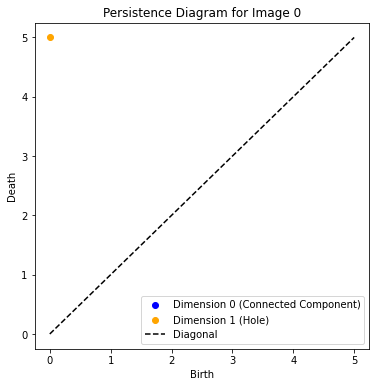

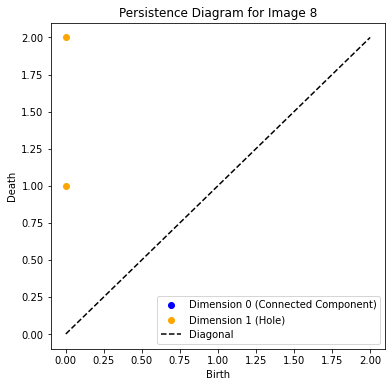

In [3]:
image_0 = np.array([
    [5, 5, 0, 5],
    [5, 0, 5, 0],
    [5, 5, 0, 5],
    [5, 5, 5, 5]
])

image_8 = np.array([
    [0, 0, 0, 0],
    [0, 1, 0, 0],
    [1, 0, 2, 0],
    [0, 1, 0, 0]
])

pd_image_0 = compute_persistence(image_0)
pd_image_8 = compute_persistence(image_8)

plot_persistence_diagram(pd_image_0, 'Persistence Diagram for Image 0')
plot_persistence_diagram(pd_image_8, 'Persistence Diagram for Image 8')

In [4]:
data = pd.read_csv('image.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
image_0 = data[data['label'] == 0].iloc[1, 1:].values.reshape(28, 28)
image_8 = data[data['label'] == 8].iloc[2, 1:].values.reshape(28, 28)
image_9 = data[data['label'] == 9].iloc[0, 1:].values.reshape(28, 28)

def invert_image(image):
    return 255 - image

image_0 = invert_image(image_0)
image_8 = invert_image(image_8)
image_9 = invert_image(image_9)

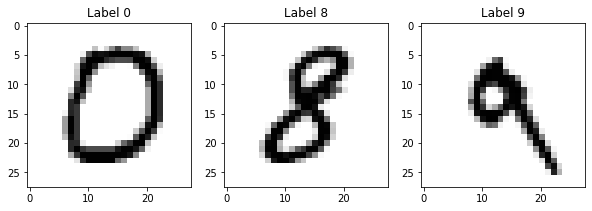

In [9]:
plt.rcParams['text.usetex'] = False

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_0, cmap='gray')
plt.title('Label 0')

plt.subplot(1, 3, 2)
plt.imshow(image_8, cmap='gray')
plt.title('Label 8')

plt.subplot(1, 3, 3)
plt.imshow(image_9, cmap='gray')
plt.title('Label 9')

plt.show()

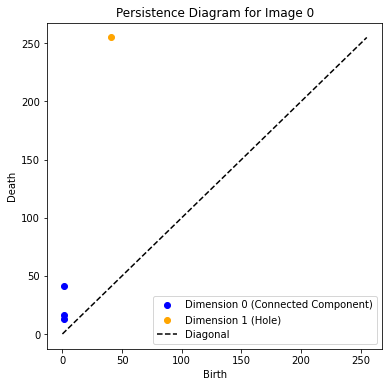

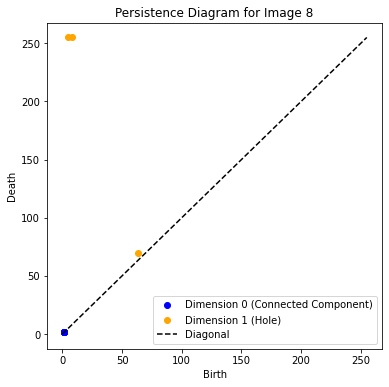

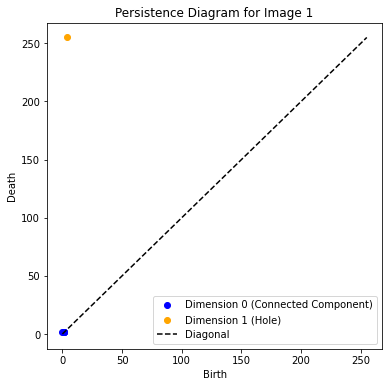

In [10]:
pd_image_0 = compute_persistence(image_0)
pd_image_8 = compute_persistence(image_8)
pd_image_9 = compute_persistence(image_9)

plot_persistence_diagram(pd_image_0, 'Persistence Diagram for Image 0')
plot_persistence_diagram(pd_image_8, 'Persistence Diagram for Image 8')
plot_persistence_diagram(pd_image_9, 'Persistence Diagram for Image 1')